<a href="https://colab.research.google.com/github/AdnanSakal/Task-Assignment/blob/main/AI_ML_Engineer_Position_at_Backbencher_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries
# -------------------------

# Core libraries
import re
import os
import string
import random
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Natural Language Processing
import nltk
from nltk.corpus import stopwords

# Machine Learning Utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_fscore_support,
    accuracy_score,
    ConfusionMatrixDisplay
)

# Deep Learning
import tensorflow as tf

In [ ]:
# Install Kaggle package
!pip install -q kaggle

In [ ]:
# Upload Kaggle API key (kaggle.json)
files.upload()

In [ ]:
# Create Kaggle directory and set permissions
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset from Kaggle
!kaggle datasets download -d "mantri7/imdb-movie-reviews-dataset"

In [ ]:
# Open the ZIP file containing the dataset
zip_ref = zipfile.ZipFile("/content/imdb-movie-reviews-dataset.zip")

# Extract all files from the ZIP archive into the current working directory
zip_ref.extractall()

# Close the ZIP file to free system resources
zip_ref.close()

In [ ]:
# Load training and testing data also rename columns for clarity
train_df = pd.read_csv("/content/train_data (1).csv").rename(columns = {"0":"Text","1":"Label"})
test_df = pd.read_csv("/content/test_data (1).csv").rename(columns = {"0":"Text","1":"Label"})

In [ ]:
# Inspect the first few rows
train_df.head()

,Text,Label
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [ ]:
# Shuffle the training dataframe to ensure random ordering
train_df_shuffle = train_df.sample(frac = 1,random_state=42)

# Inspect the first few rows
train_df_shuffle.head()

,Text,Label
6868,Immediately after renting and watching this mo...,0
24016,"This was a highly original decent movie, and a...",1
9668,I do not watch much television and came across...,0
13640,7 if you're a kid- 6 if you claim to be an adu...,1
14018,I think I agree that a lot of the comments her...,0


In [ ]:
# Inspect the first few rows of test_df
test_df.head()

,Text,Label
0,I did not enjoy the film Eraser whatsoever. It...,0
1,Be very afraid of anyone who likes this film. ...,0
2,The 3rd and last big screen spin off from the ...,0
3,Barely three and a half years after just scrap...,1
4,I'm a big fan of the demonic puppets. Looking ...,0


In [ ]:
# Check Class Distribution in Training Data
train_df["Label"].value_counts()

,count
Label,
0,12500
1,12500


In [ ]:
# Get the number of samples in the training and test datasets
len(train_df),len(test_df)

(25000, 25000)

In [ ]:
# Display 10 random samples with their labels and review text to know how data looks

target = train_df["Label"]
text = train_df["Text"]
for i in range(10):
  rand = random.randint(0,len(train_df))
  print(f"Target: {target[rand]}","(Positive)" if target[rand] > 0 else "(Negative)")
  print(f"Text: \n{text[rand]}\n")
  print("--------\n")

Target: 1 (Positive)
Text: 
I was overtaken by the emotion. Unforgettable rendering of a wartime story which is unknown to most people. The performances were faultless and outstanding.

--------

Target: 1 (Positive)
Text: 
The Sensuous Nurse (1975) was a Italian sexual comedy that starred the one time Bond girl Ursula Andress. Man was she hot in this movie.. She was stacked and built like a *@#% brick house. Ursula was smoking hot in this movie. I have never seen a nurse's outfit that filled out before. <br /><br />Ms. Andress stars as a nurse who is hired to take care of a rich elderly man. Even one in the house seems to be knocking the boots. One night, the nurse decides to take the grandson's temperature and give some needed T.L.C. to her ancient client. The old man takes to his nurse and this angers the rest of the family. What kind of job did the family hire her out to do? Will the geezer fall for her car giver? How can she deal with the octogenarian crone and the rest of the fam

In [ ]:
# Function to preprocess text data

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def preprocess(text):
  text = re.sub(r"<.*?>",' ',text)
  text = text.translate(str.maketrans("","",string.punctuation))
  text = re.sub(r"\d+","",text)
  text = text.lower()
  text = ' '.join([i for i in text.split() if i not in stop_words])
  text = re.sub(r"\s+", " ", text).strip()
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply the preprocess function to clean all training text
train_df_shuffle["Text"] = train_df_shuffle["Text"].apply(preprocess)

In [ ]:
# Split shuffled data into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test = train_test_split(train_df_shuffle["Text"].to_numpy(),
                                                 train_df_shuffle["Label"].to_numpy(),
                                                 test_size = 0.2,
                                                 random_state = 42
                                                 )

In [ ]:
# Check the number of samples in training and testing sets
len(x_train),len(x_test),len(y_train),len(y_test)

(20000, 5000, 20000, 5000)

In [ ]:
# Create and train a Pipeline with TF-IDF vectorizer and MultinomialNB classifier
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the trained model on the testing set and get accuracy
model_0.score(x_test,y_test)

0.8654

In [ ]:
# Predict labels for the testing set using the trained model
y_pred_0 = model_0.predict(x_test)
y_pred_0

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
# Define a function to compute accuracy, precision, recall, and F1 score
def evaluation_metrics(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision,recall,f1_score,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  return{
      "accuracy":accuracy,
      "precision":precision,
      "recall":recall,
      "f1_score":f1_score
  }

In [ ]:
# Calculate and store evaluation metrics for model_0 (NB)
model_0_results = evaluation_metrics(y_test,y_pred_0)
model_0_results

{'accuracy': 0.8654,
 'precision': 0.8663859708188724,
 'recall': 0.8654,
 'f1_score': 0.8653336495323379}

In [ ]:
# Create and train a Pipeline with TF-IDF vectorizer and Logistic Regression classifier
model_1 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",LogisticRegression())
])
model_1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
# Evaluate the trained Logistic Regression model on the testing set
model_1.score(x_test,y_test)

0.8952

In [ ]:
# Predict labels for the testing set using the trained Logistic Regression model
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
# Calculate and store evaluation metrics for model_1 (LR)
model_1_results = evaluation_metrics(y_test,y_pred_1)
model_1_results

{'accuracy': 0.8952,
 'precision': 0.8956051572679575,
 'recall': 0.8952,
 'f1_score': 0.8951614813448796}

In [ ]:
# Create and train a Pipeline with TF-IDF vectorizer and Random Forest classifier
model_2 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",RandomForestClassifier(n_estimators=100, random_state=42))
])

model_2.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [ ]:
# Evaluate the trained Random Forest model on the testing set
model_2.score(x_test,y_test)

0.8486

In [ ]:
# Predict labels for the testing set using the trained Random Forest model
y_pred_2 = model_2.predict(x_test)
y_pred_2

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
# Calculate and store evaluation metrics for model_2 (RF)
model_2_results = evaluation_metrics(y_test,y_pred_2)
model_2_results

{'accuracy': 0.8486,
 'precision': 0.8489588953590017,
 'recall': 0.8486,
 'f1_score': 0.8485780813992724}

In [ ]:
# Store model accuracies for comparison
ML_model_performace = {
    "model_0 (NB)": model_0_results["accuracy"],
    "model_1 (LR)": model_1_results["accuracy"],
    "model_2 (RF)": model_2_results["accuracy"],
}
ML_model_performace

{'model_0 (NB)': 0.8654, 'model_1 (LR)': 0.8952, 'model_2 (RF)': 0.8486}

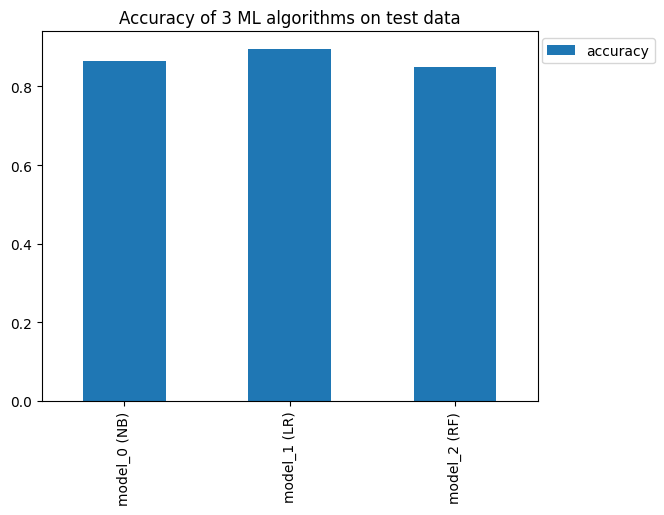

In [113]:
# Plot a bar chart showing the accuracy of the three ML models on the test set
pd.DataFrame(ML_model_performace,index = ['accuracy']).T.plot(kind="bar").legend(bbox_to_anchor=(1.25,1))
plt.title("Accuracy of 3 ML algorithms on test data")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix of model_1 (LR)')

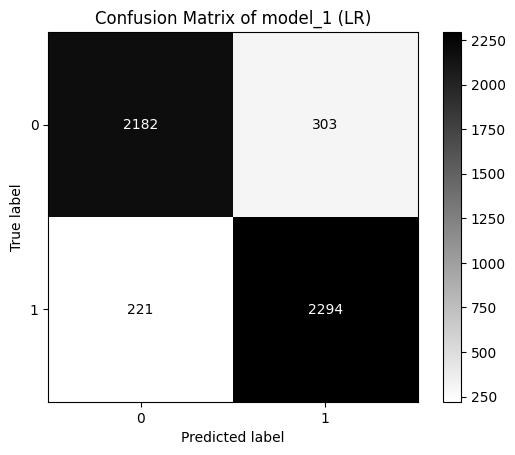

In [ ]:
# Display the confusion matrix for model_1 (Logistic Regression) predictions
cm = confusion_matrix(y_test,y_pred_1)
ConfusionMatrixDisplay(cm).plot(cmap = "binary")
plt.title("Confusion Matrix of model_1 (LR)")

In [ ]:
# Save the trained Logistic Regression model to a .pkl file using joblib
joblib.dump(model_1, "model_1 (logistic_reg).pkl")

['model_1 (logistic_reg).pkl']

# Deep Learning Model (Bounus)

In [ ]:
# Calculate the number of words in each training sentence
sentc_lens = [len(i.split()) for i in x_train]

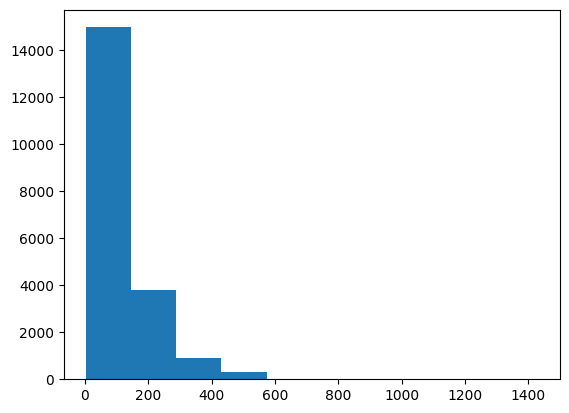

In [ ]:
# Plot a histogram of sentence lengths
plt.hist(sentc_lens)
plt.show()

In [ ]:
# Get the 95th percentile of sentence lengths
np.percentile(sentc_lens,95)

np.float64(311.0)

In [ ]:
# Create a TextVectorization layer
text_vect = tf.keras.layers.TextVectorization(max_tokens = 10000,
                                              output_sequence_length = 311
                                              )

In [ ]:
# Fit the TextVectorization layer to the training data
text_vect.adapt(x_train)

In [94]:
# Create an embedding layer
embed = tf.keras.layers.Embedding(input_dim=10000,
                                  output_dim = 16
                                  )

In [128]:
# Build the model architecture
input_layer = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = text_vect(input_layer)
x = embed(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
output_layer = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

In [ ]:
# Compile and train the deep learning model
model_3 = tf.keras.Model(input_layer,output_layer)
model_3.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his = model_3.fit(x_train,y_train,
                    epochs = 5,
                    validation_data = (x_test,y_test)
                    )

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 7ms/step - accuracy: 0.5552 - loss: 0.6700 - val_accuracy: 0.6746 - val_loss: 0.5544
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8421 - loss: 0.3687 - val_accuracy: 0.8354 - val_loss: 0.3556
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8748 - loss: 0.2934 - val_accuracy: 0.8384 - val_loss: 0.3604
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9042 - loss: 0.2405 - val_accuracy: 0.8830 - val_loss: 0.2940
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9132 - loss: 0.2151 - val_accuracy: 0.8892 - val_loss: 0.2835


In [101]:
# Function to plot training and validation loss and accuracy curves
def plot_loss_curve(his):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]
  acc = his.history["accuracy"]
  val_acc = his.history["val_accuracy"]

  plt.plot(loss,label = "loss")
  plt.plot(val_loss,label = "val_loss")
  plt.xlabel("epoch")
  plt.title("Loss")
  plt.legend()

  plt.figure()

  plt.plot(acc,label = "accuracy")
  plt.plot(val_acc,label = "val_accuracy")
  plt.xlabel("epoch")
  plt.title("Accuracy")
  plt.legend()

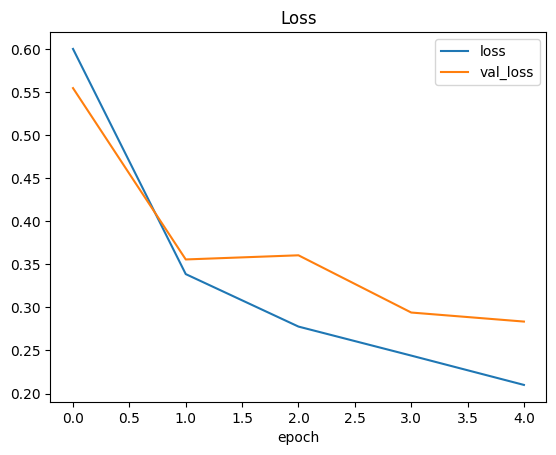

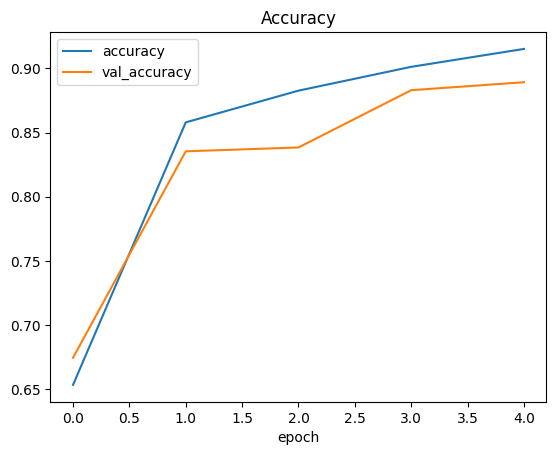

In [102]:
plot_loss_curve(his)

In [103]:
y_pred_3 = model_3.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [106]:
# Round model_3 predictions to get binary labels
y_pred_3 = y_pred_3.round()
y_pred_3

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [107]:
model_3_results = evaluation_metrics(y_test,y_pred_3)
model_3_results

{'accuracy': 0.8892,
 'precision': 0.8893690091257885,
 'recall': 0.8892,
 'f1_score': 0.8891955679290868}

In [108]:
# Store accuracy of Logistic Regression and deep learning model for comparison
ML_DL_model_acc = {
    "model_1 (LR)":model_1_results["accuracy"],
    "model_3 (DL)":model_3_results["accuracy"]
}

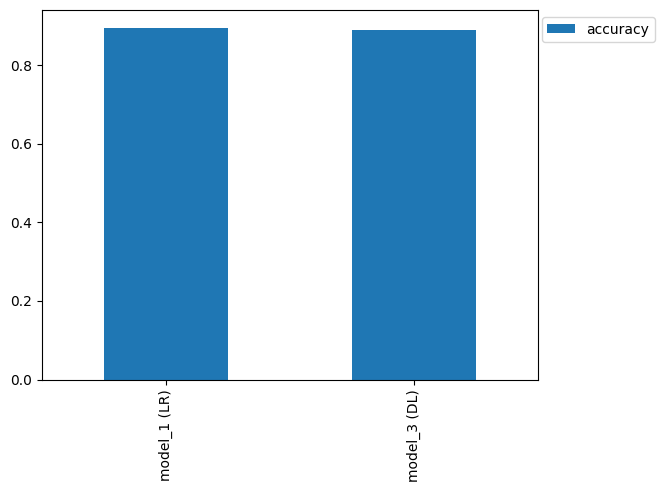

In [112]:
# Plot a bar chart comparing accuracy of Logistic Regression and deep learning model
pd.DataFrame(ML_DL_model_acc,index = ["accuracy"]).T.plot(kind = "bar").legend(bbox_to_anchor = (1.25,1))